In [0]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [94]:
# sebelumnya, dataset didownload & dipisahkan antara data training & validation
# dengan perbandingan 9 : 1, kemudian diupload ke g-drive

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [95]:
!ls '/content/gdrive/My Drive/sample_data/'

rockpaperscissors  rockpaperscissors.zip


In [0]:
import zipfile
local_zip = '/content/gdrive/My Drive/sample_data/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/gdrive/My Drive/sample_data/rockpaperscissors/')
zip_ref.close()

In [0]:
import os
base_dir = '/content/gdrive/My Drive/sample_data/rockpaperscissors/images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [98]:
os.listdir('/content/gdrive/My Drive/sample_data/rockpaperscissors/images/train')

['paper', 'rock', 'scissors']

In [99]:
os.listdir('/content/gdrive/My Drive/sample_data/rockpaperscissors/images/val')

['paper', 'rock', 'scissors']

In [0]:
train_paper_dir = os.path.join(train_dir, 'paper')
train_rock_dir = os.path.join(train_dir, 'rock')
train_scissors_dir = os.path.join(train_dir, 'scissors')

validation_paper_dir = os.path.join(validation_dir, 'paper')
validation_rock_dir = os.path.join(validation_dir, 'rock')
validation_scissors_dir = os.path.join(validation_dir, 'scissors')

In [0]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    vertical_flip=True,
                    width_shift_range=20,
                    height_shift_range=20,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    vertical_flip=True,
                    width_shift_range=20,
                    height_shift_range=20,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [102]:
train_generator = train_datagen.flow_from_directory(
        train_dir, 
        target_size=(100, 150), 
        batch_size=32,
        color_mode='grayscale',
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir, 
        target_size=(100, 150),
        batch_size=32,
        color_mode='grayscale',
        class_mode='categorical')

Found 1970 images belonging to 3 classes.
Found 218 images belonging to 3 classes.


In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 150, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.RMSprop(),
              metrics=['accuracy'])

In [105]:
model.fit(
      train_generator,
      steps_per_epoch=25,  
      epochs=20,
      validation_data=validation_generator,
      validation_steps=5, 
      verbose=1)

Epoch 1/20
25/25 [==============================] - 25s 1s/step - loss: 1.1305 - accuracy: 0.3262 - val_loss: 1.0989 - val_accuracy: 0.3125
Epoch 2/20
25/25 [==============================] - 25s 996ms/step - loss: 1.0932 - accuracy: 0.3975 - val_loss: 0.9984 - val_accuracy: 0.6125
Epoch 3/20
25/25 [==============================] - 25s 995ms/step - loss: 1.0343 - accuracy: 0.4800 - val_loss: 0.9441 - val_accuracy: 0.5688
Epoch 4/20
25/25 [==============================] - 25s 990ms/step - loss: 0.9028 - accuracy: 0.5800 - val_loss: 0.8224 - val_accuracy: 0.5813
Epoch 5/20
25/25 [==============================] - 24s 976ms/step - loss: 0.7583 - accuracy: 0.6603 - val_loss: 0.5607 - val_accuracy: 0.8250
Epoch 6/20
25/25 [==============================] - 24s 973ms/step - loss: 0.5583 - accuracy: 0.7786 - val_loss: 0.5155 - val_accuracy: 0.8062
Epoch 7/20
25/25 [==============================] - 24s 969ms/step - loss: 0.5579 - accuracy: 0.7913 - val_loss: 0.6578 - val_accuracy: 0.7000
Ep

Saving 0Uomd0HvOB33m47I.png to 0Uomd0HvOB33m47I.png
paper


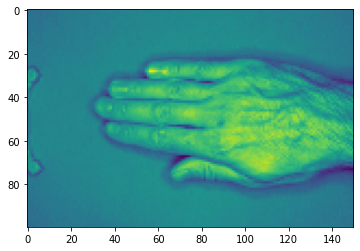

In [107]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  path = fn
  img = image.load_img(path, color_mode = "grayscale", target_size=(100,150,1))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  y = model.predict(images, batch_size=10)
  labels = ['paper', 'rock', 'scissors']
  print(labels[np.argmax(y)])